In [1]:
import numpy as np
import rasterio as rio
from rasterio.plot import plotting_extent

import earthpy.plot as ep
from matplotlib import pyplot as plt

In [2]:
with rio.open('../../../sdb_src/data/great_lakes/erie_lld/erie_lld.tif') as src:
    bathymetric_map = src.read(masked=True)
    extent = plotting_extent(src)
    

In [3]:
bathymetric_map_below = np.where(bathymetric_map > 0, 0, bathymetric_map)
bathymetric_map_below = np.where(bathymetric_map_below < -300, 0, bathymetric_map_below)

In [4]:
bathymetric_map_below.shape

(1, 2401, 7201)

In [5]:
bathymetric_map_below.min()

-62.576897

In [6]:
bathymetric_map.shape

(1, 2401, 7201)

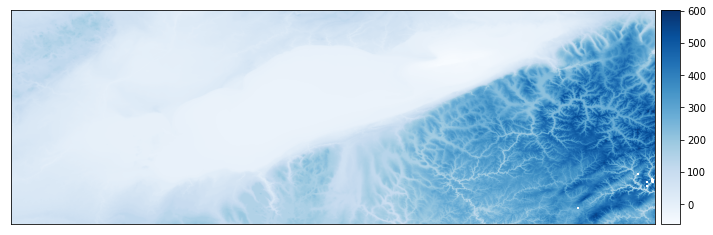

<AxesSubplot:>

In [7]:
ep.plot_bands(bathymetric_map, cmap='Blues', extent=extent, cbar=True)

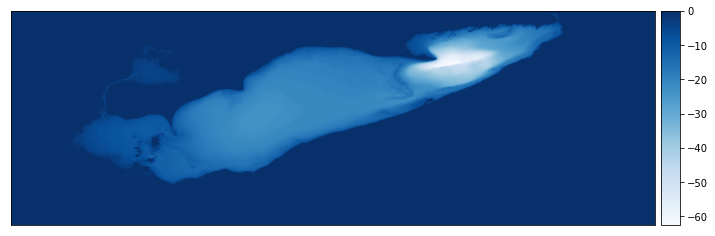

<AxesSubplot:>

In [8]:
ep.plot_bands(bathymetric_map_below, cmap='Blues', extent=extent, cbar=True)

In [9]:
bathymetric_map.shape

(1, 2401, 7201)

In [10]:
src.crs

CRS.from_epsg(4269)

In [11]:
src.bounds

BoundingBox(left=-84.00041666666665, bottom=40.99958333333335, right=-77.99958333357336, top=43.000416666586645)

In [14]:
src.profile

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 7201, 'height': 2401, 'count': 1, 'crs': CRS.from_epsg(4269), 'transform': Affine(0.0008333333333, 0.0, -84.00041666666665,
       0.0, -0.0008333333333, 43.000416666586645), 'tiled': False}

In [15]:
with rio.open('../data/erie_lake/TIF/cropped/erie_lake_sentinel_l2a_r10m.tif') as rawsrc:
    raw = rawsrc.read()

In [16]:
raw.shape

(4, 10980, 10980)

In [17]:
rawsrc.bounds

BoundingBox(left=399960.0, bottom=4590240.0, right=509760.0, top=4700040.0)

In [19]:
rawsrc.profile

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 4, 'crs': CRS.from_epsg(32617), 'transform': Affine(10.0, 0.0, 399960.0,
       0.0, -10.0, 4700040.0), 'tiled': False}

In [24]:
src.bounds.top - src.bounds.bottom

2.000833333253297

In [18]:
rawsrc.crs

CRS.from_epsg(32617)

In [29]:
cropextent = plotting_extent(rawsrc)
cropextent

(399960.0, 509760.0, 4590240.0, 4700040.0)

In [25]:
src.transform

Affine(0.0008333333333, 0.0, -84.00041666666665,
       0.0, -0.0008333333333, 43.000416666586645)

In [27]:
rawsrc.transform

Affine(10.0, 0.0, 399960.0,
       0.0, -10.0, 4700040.0)

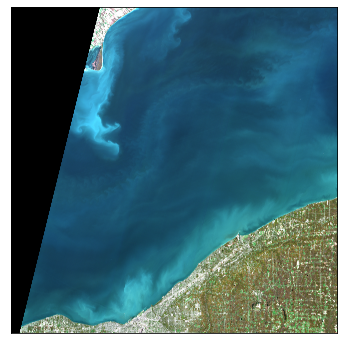

In [30]:
fig, ax = plt.subplots(figsize=(12, 6))
ep.plot_rgb(
    raw,
    rgb=[2, 1, 0],
    ax=ax,
    stretch=True,
    extent=plotting_extent(rawsrc)
)
plt.show()

In [14]:
bathymetric_map

masked_array(
  data=[[[57.3785400390625, 57.3785400390625, 57.3785400390625, ...,
          92.53204345703125, 86.53204345703125, 92.53204345703125],
         [58.3785400390625, 57.3785400390625, 57.37855529785156, ...,
          89.53204345703125, 88.53204345703125, 88.53204345703125],
         [58.3785400390625, 58.3785400390625, 57.37855529785156, ...,
          89.53204345703125, 88.53204345703125, 88.53204345703125],
         ...,
         [43.50718688964844, 45.50718688964844, 46.5072021484375, ...,
          312.5380554199219, 313.5380554199219, 312.5380554199219],
         [43.50718688964844, 47.5072021484375, 48.5072021484375, ...,
          285.5380554199219, 285.5380554199219, 287.5380554199219],
         [48.50718688964844, 51.5072021484375, 50.5072021484375, ...,
          278.5380554199219, 275.5380554199219, 276.5380554199219]]],
  mask=[[[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, Fa

In [15]:
from shapely.geometry import box
import geopandas as gpd

In [16]:
list(src.bounds)

[-84.00041666666665, 40.99958333333335, -77.99958333357336, 43.000416666586645]

In [17]:
def get_bounding_box(rasterio_object, buffer_size=0):
    """
    Returns the bounding box of a geopandas object

    Parameters
    ----------
    gpd_object : geopandas object
        The geopandas object to get the bounding box of
    buffer_size : int
        The buffer size to add to the bounding box

    Returns
    -------
    bounding_box : geopandas series
        The bounding box of the geopandas object
    """
    minx, miny, maxx, maxy = rasterio_object.bounds
    minx, miny, maxx, maxy = minx - buffer_size, miny - buffer_size, maxx + buffer_size, maxy + buffer_size
    bounding_poly = box(minx, miny, maxx, maxy)
    bounding_series = gpd.GeoSeries([bounding_poly], crs=rasterio_object.crs)

    return bounding_series

In [18]:
bounding_box = get_bounding_box(src)

In [19]:
import getpass
import json

import sentinelsat as sat
from sentinelsat import SentinelAPI, make_path_filter

In [20]:
copernicus_user = getpass.getpass('Enter Copernicus id: ')

Enter Copernicus id: ········


In [ ]:
copernicus_password = getpass.getpass('Enter Copernicus password: ')

In [ ]:
with rio.open("../data/erie_lake/TIF/cropped/erie_lake_sentinel_l2a_r10m.tif") as roi:
    cropOut = roi.read()

In [ ]:
api = SentinelAPI(copernicus_user, copernicus_password, 'https://scihub.copernicus.eu/dhus')

In [ ]:
json.loads(bounding_box.to_json())

In [ ]:
footprint = sat.geojson_to_wkt(json.loads(bounding_box.to_json()))
footprint

In [ ]:
products = api.query(footprint, date=('20211101', '20211110'), 
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                    cloudcoverpercentage = (0,5))

In [ ]:
areas = api.to_geodataframe(products)

In [ ]:
areas

In [ ]:
areas.sort_values(by='cloudcoverpercentage', ascending=True)[["title", "link", "cloudcoverpercentage"]]

In [ ]:
areas.columns

In [ ]:
cloud_min_id = areas.sort_values(by='cloudcoverpercentage', ascending=True)['uuid'][6]
nodefilter = make_path_filter('*_b0[2348]_10m.jp2') # collect BGRN bands
product_info = api.download(cloud_min_id, directory_path='../data/erie_lake/TIF/', nodefilter=nodefilter)
product_info

In [ ]:
import glob

In [ ]:
r10m_base = r'../data/erie_lake/TIF/S2A_MSIL2A_20211107T161501_N0301_R140_T17TMG_20211116T141350.SAFE/GRANULE/L2A_T17TMG_A033313_20211107T161808/IMG_DATA/R10m/'
r10m_globbing_pattern = f'{r10m_base}/*.jp2'
stack_band_path = glob.glob(r10m_globbing_pattern)
stack_band_path.sort()
stack_band_path

In [ ]:
import earthpy.spatial as es

In [ ]:
!mkdir ..\\data\\erie_lake\\TIF\\S2A_MSIL2A_20211107T161501_N0301_R140_T17TMG_20211116T141350.SAFE\\stack

In [ ]:
array, raster_prof = es.stack(stack_band_path, out_path= '..\\data\\erie_lake\\TIF\\S2A_MSIL2A_20211107T161501_N0301_R140_T17TMG_20211116T141350.SAFE\\stack\\raster.jp2')
raster_prof

In [ ]:
extent = plotting_extent(array[0], raster_prof["transform"])
extent

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
ep.plot_rgb(
    array,
    rgb=[2, 1, 0],
    ax=ax,
    stretch=True,
    extent=extent,
    str_clip=0.5
)
plt.show()

In [ ]:
array.shape

In [ ]:
cropped_array.shape

In [ ]:
bounding_box.crs

In [ ]:
with rio.open(stack_band_path[0]) as raster_crs:
    crop_raster_profile = raster_crs.profile
    crop_bound_projected = bounding_box.to_crs(crop_raster_profile["crs"])
    
crop_bound_projected

In [ ]:
!mkdir ..\\data\\erie_lake\\TIF\\S2A_MSIL2A_20211107T161501_N0301_R140_T17TMG_20211116T141350.SAFE\\crop

In [ ]:
crop_output_dir = "..\\data\\erie_lake\\TIF\\S2A_MSIL2A_20211107T161501_N0301_R140_T17TMG_20211116T141350.SAFE\\crop"

band_paths_list = es.crop_all(
    stack_band_path, crop_output_dir, crop_bound_projected, overwrite=True
)

In [ ]:
cropped_array, array_raster_profile = es.stack(band_paths_list)
crop_extent = plotting_extent(
    cropped_array[0], array_raster_profile["transform"]
)

# Plotting the cropped image
fig, ax = plt.subplots(figsize=(12, 6))
crop_bound_projected.boundary.plot(ax=ax, color="red", zorder=10)
ep.plot_rgb(
    cropped_array,
    rgb=[2, 1, 0],
    ax=ax,
    stretch=True,
    extent=crop_extent
)
plt.show()

In [ ]:
with rio.open("../data/erie_lake/TIF/cropped/erie_lake_sentinel_l2a_r10m.tif", "w", **array_raster_profile) as dst:
    dst.write(cropped_array)

In [ ]:
crop_extent

In [ ]:
crop_bound_projected

In [ ]:
bounding_box

In [ ]:
raster_crs.profile

In [ ]:
raster_crs